In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("CAR.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [72]:
df.shape

(4340, 8)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [74]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [75]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [76]:
  # Feature Engineering
    #--Create Car Age
current_year = 2025

df["car_age"] = current_year - df["year"]

In [80]:
df.drop(["year", "name"], axis=1, inplace=True)

In [37]:
# Encoding Categorical Variables

In [81]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,18,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,18,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,13,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,8,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,11,True,False,False,False,True,False,True,False,True,False,False


In [39]:
 # Exploratory Data Analysis

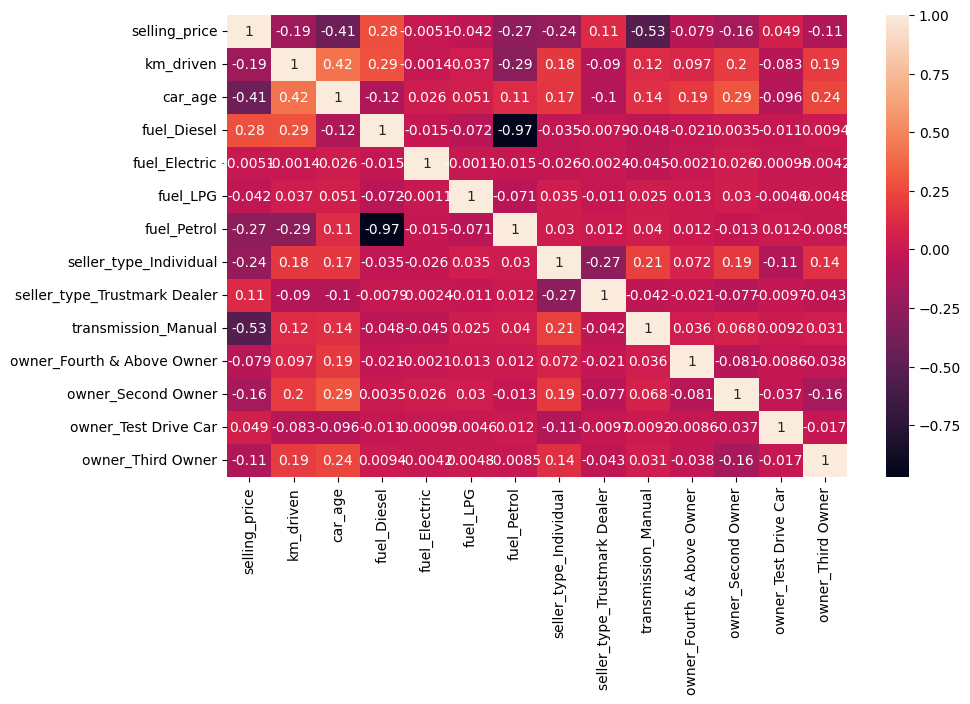

In [82]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

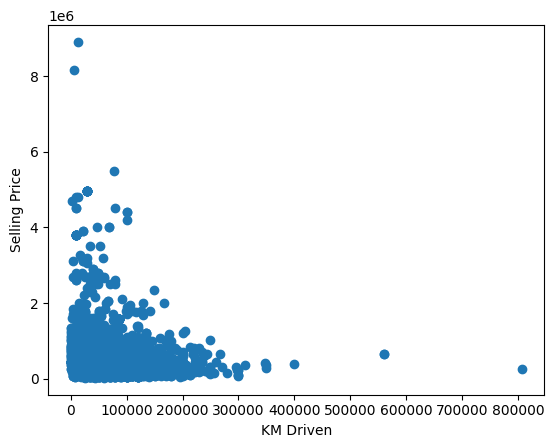

In [83]:
#   Price vs km_driven
plt.scatter(df["km_driven"], df["selling_price"])
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.show()

In [84]:
# Split Features & Target
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [85]:
#  train_test_split

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
#  Feature Scaling
    #--StandardScaler

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Training the model

In [88]:
 # linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
# Prediction
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation

In [90]:
 # R² Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.4031303601432117


In [97]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 182146878750.28098


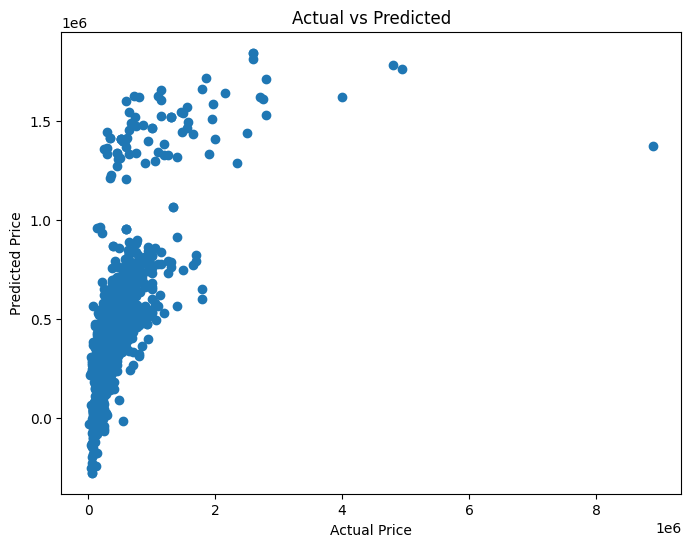

In [100]:
# Visualization of Results
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [101]:
# Model Coefficients
coeff = pd.DataFrame(
    model.coef_,
    index=X.columns,
    columns=["Coefficient"])
coeff.sort_values(by="Coefficient", ascending=False)
                    # positive coefficient → increases price
                    # Negative coefficient → decreases price


,Coefficient
fuel_Diesel,279850.784859
seller_type_Trustmark Dealer,169804.231596
owner_Test Drive Car,130679.819988
fuel_LPG,53484.366182
owner_Fourth & Above Owner,613.220830
km_driven,-1.006935
fuel_Petrol,-20697.354665
owner_Third Owner,-27064.751807
car_age,-35764.442216
owner_Second Owner,-36045.713660


In [102]:
    # Save Model

import os
import joblib
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/linear_regression_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
print("Model Saved ")

Model Saved 


In [109]:
# Prediction

import pandas as pd

sample = X.iloc[[0]]

sample_scaled = loaded_scaler.transform(sample)

# convert back to dataframe with feature names
sample_scaled_df = pd.DataFrame(
    sample_scaled,
    columns=X.columns
)

prediction = loaded_model.predict(sample_scaled_df)

print("Predicted Price:", prediction[0])

Predicted Price: 1034445.7864733831
